PRIMEIRA APLICAÇÃO DE APRENDIZADO DE MÁQUINA

In [241]:
# Importando bibliotecas
import pandas as pd
import numpy as np

from imblearn.under_sampling import RandomUnderSampler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [242]:
# Ler dados do DataSet
csv_dir_treinamento = "/content/sample_data/smoke_detection_iot.csv"
data = pd.read_csv(csv_dir_treinamento, delimiter=",")

In [243]:
data.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [244]:
# Pegar informações para ver se são dados númericos ou precisa ser tratado e se tem nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [245]:
for col in data.columns:
  min = data[col].min()
  max = data[col].max()
  print(f'Coluna: {col} - Máximo: {max} - Mínimo: {min} - Diferença: {max - min}')

Coluna: Unnamed: 0 - Máximo: 62629 - Mínimo: 0 - Diferença: 62629
Coluna: UTC - Máximo: 1655130051 - Mínimo: 1654712187 - Diferença: 417864
Coluna: Temperature[C] - Máximo: 59.93 - Mínimo: -22.01 - Diferença: 81.94
Coluna: Humidity[%] - Máximo: 75.2 - Mínimo: 10.74 - Diferença: 64.46000000000001
Coluna: TVOC[ppb] - Máximo: 60000 - Mínimo: 0 - Diferença: 60000
Coluna: eCO2[ppm] - Máximo: 60000 - Mínimo: 400 - Diferença: 59600
Coluna: Raw H2 - Máximo: 13803 - Mínimo: 10668 - Diferença: 3135
Coluna: Raw Ethanol - Máximo: 21410 - Mínimo: 15317 - Diferença: 6093
Coluna: Pressure[hPa] - Máximo: 939.861 - Mínimo: 930.852 - Diferença: 9.009000000000015
Coluna: PM1.0 - Máximo: 14333.69 - Mínimo: 0.0 - Diferença: 14333.69
Coluna: PM2.5 - Máximo: 45432.26 - Mínimo: 0.0 - Diferença: 45432.26
Coluna: NC0.5 - Máximo: 61482.03 - Mínimo: 0.0 - Diferença: 61482.03
Coluna: NC1.0 - Máximo: 51914.68 - Mínimo: 0.0 - Diferença: 51914.68
Coluna: NC2.5 - Máximo: 30026.438 - Mínimo: 0.0 - Diferença: 30026.438


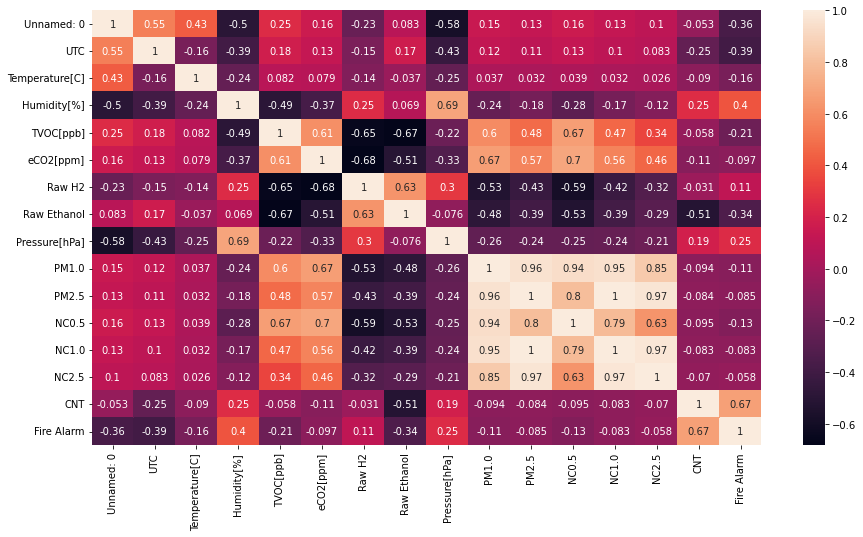

In [246]:
# Gráfico de correlação no dataset
plt.figure(figsize=[15, 8])
sns.heatmap(data.corr(), annot = True)

In [247]:
# Remover coluna de Indice e coluanas que não ajudam na classificação
data.drop(['Unnamed: 0' , 'CNT', 'Raw Ethanol', 'Pressure[hPa]', 'UTC', 'Humidity[%]', 'TVOC[ppb]'], axis=1, inplace=True)

NORMALIZAÇÃO DADOS


In [248]:
# Pegar os datasets separados
y = data['Fire Alarm']
X = data.drop(['Fire Alarm'], axis=1)

In [249]:
# https://learn.microsoft.com/pt-br/azure/machine-learning/component-reference/normalize-data
from sklearn.preprocessing import StandardScaler

# Instancia o MaxAbsScaler
p = StandardScaler()
X = p.fit_transform(X)

VISUALIZAÇÃO DE DADOS

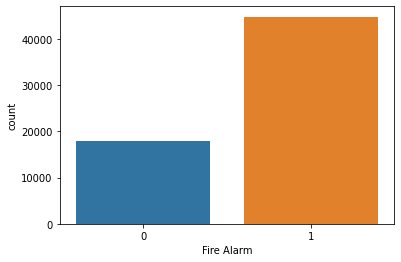

In [250]:
# Ver se os dados estão balanceados
sns.countplot(data['Fire Alarm'])

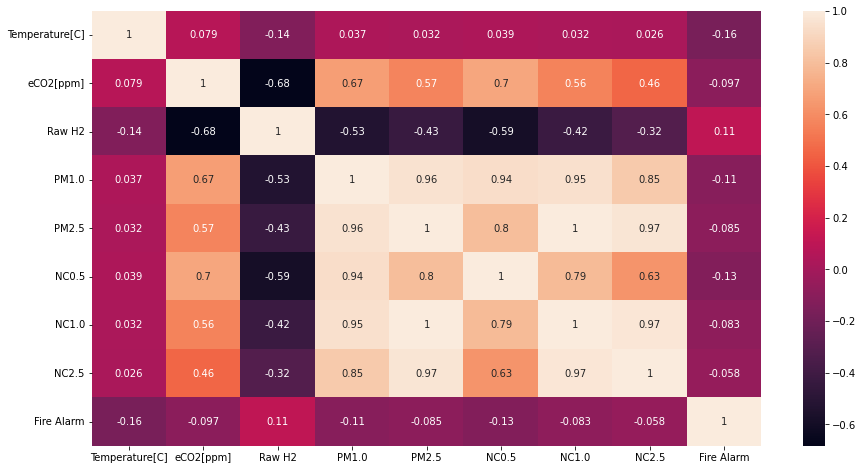

In [251]:
# Gráfico de correlação no dataset - Após aplicar pré-processamento
plt.figure(figsize=[15, 8])
sns.heatmap(data.corr(), annot = True)

APLICAÇÃO MODELOS - MACHINE LEARNING

In [252]:
# Separar dados de treinamento e de testes
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [253]:
# Criando a árvore e definindo o criterio de criação usando entropia
tree_classifier = DecisionTreeClassifier(criterion="entropy")
tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [254]:
# Mostrar métricas
print("Accuracy score = ", accuracy_score(y_test, tree_classifier.predict(x_test)))
print(classification_report(y_test, tree_classifier.predict(x_test)))

Accuracy score =  0.991617435733674
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3605
           1       0.99      1.00      0.99      8921

    accuracy                           0.99     12526
   macro avg       0.99      0.99      0.99     12526
weighted avg       0.99      0.99      0.99     12526



In [255]:
# Random Forest
rforest = RandomForestClassifier(max_features=3, criterion='entropy', random_state=0)
rforest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=3, random_state=0)

In [256]:
# Mostrar métricas
print('Random Forest')
print("Accuracy score = ", accuracy_score(y_test, rforest.predict(x_test)))
print(classification_report(y_test, rforest.predict(x_test)))

Random Forest
Accuracy score =  0.9922561072968226
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3605
           1       0.99      1.00      0.99      8921

    accuracy                           0.99     12526
   macro avg       0.99      0.99      0.99     12526
weighted avg       0.99      0.99      0.99     12526

